In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings("ignore")

# Data collecting

In [52]:
data = pd.read_csv("data.csv", error_bad_lines = False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

# Data visualization

In [53]:
data.head(5)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [54]:
data.shape

(669640, 2)

In [55]:
data.columns

Index(['password', 'strength'], dtype='object')

In [56]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

# Data preproccesing

## Null values

In [57]:
data.isnull().sum()

password    1
strength    0
dtype: int64

### Remove null values

In [58]:
data.dropna(inplace=True)

In [59]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [60]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [61]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


# Data analysis

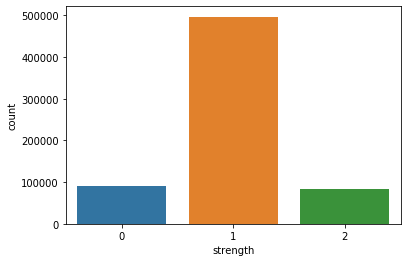

In [62]:
sns.countplot(x = data["strength"] )

In [63]:
data_array = np.array(data)

In [64]:
data_array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

## Creating feature columns from text

In [65]:
import random

In [66]:
random.shuffle(data_array)

In [67]:
data_array.shape

(669639, 2)

### Defining dependant and independant data

In [68]:
y = [listing[1] for listing in data_array]
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [69]:
x = [listing[0] for listing in data_array]
x

['kzde5577',
 'kino3434',
 'kino3434',
 'kzde5577',
 'megzy123',
 'kino3434',
 'kino3434',
 'kino3434',
 'v1118714',
 'kino3434',
 'u6c8vhow',
 'AVYq1lDE4MgAZfNt',
 'asv5o9yu',
 'asv5o9yu',
 'universe2908',
 'kzde5577',
 'kzde5577',
 'megzy123',
 'v1118714',
 'asv5o9yu',
 'as326159',
 'intel1',
 'kzde5577',
 'jerusalem393',
 'u6c8vhow',
 'klara-tershina3H',
 'jerusalem393',
 'jerusalem393',
 'kino3434',
 '6975038lp',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 '612035180tok',
 'u6c8vhow',
 'sbl571017',
 'jytifok873',
 'universe2908',
 'universe2908',
 'idofo673',
 '0169395484a',
 'schalke04',
 'pHyqueDIyNQ8vmhb',
 'asv5o9yu',
 'prisonbreak1',
 'cigicigi123',
 'idofo673',
 '612035180tok',
 'olmaz.',
 'hpqkoxsn5',
 'go7kew7a2po',
 'fk9qi21m',
 'g067057895',
 'sbl571017',
 'exitos2009',
 'kzde5577',
 '52558000aaa',
 'kzde5577',
 'czuodhj972',
 'v1118714',
 'sbl571017',
 'intel1',
 'elyass15@ajilent-ci',
 'calcifer32',
 'czuodhj972',
 'hpqkoxsn5',
 'fk9qi21m',
 'gaymaids1',
 'AVYq1lDE4MgAZfNt',
 'm

### Splitting text

In [70]:
def word_split(string):
    string1 = []
    for char in string:
        string1.append(char)
    return string1

In [71]:
word_split("hbfjd")

['h', 'b', 'f', 'j', 'd']

##  Vectorize whole X

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tf = TfidfVectorizer(tokenizer=word_split)

In [74]:
X = tf.fit_transform(x)

Now we have created ann instance of tf with desired configurations. That means x is now vectorized. So, it can be used for ML.

In [75]:
X.shape

(669639, 122)

In [78]:
features = tf.get_feature_names()
len(features)

122

## Lets calculate TF-IDF values for one password (The first one)

In [79]:
first_doc = X[0]
first_doc
importance = first_doc.T.todense()
importance

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56710957],
        [0.        ],
        [0.591672  ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [80]:
X_dataframe = pd.DataFrame(importance,index = features, columns=["TF-IDF"])

In [81]:
X_dataframe

,TF-IDF
,0.00000
,0.00000
,0.00000
,0.00000
,0.00000
,0.00000
,0.00000
,0.00000
,0.00000
,0.00000


In [82]:
X_dataframe.sort_values(by ="TF-IDF", ascending=False)

,TF-IDF
7,0.591672
5,0.567110
z,0.335897
k,0.291699
d,0.285619
e,0.220946
²,0.000000
«,0.000000
°,0.000000
±,0.000000


# Data Modeling

This data consists of Chategorical prediction data. So the algorithm to be used here will be a classification algorithm.

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X

<669639x122 sparse matrix of type '<class 'numpy.float64'>'
	with 5647075 stored elements in Compressed Sparse Row format>

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
log_reg = LogisticRegression(multi_class='multinomial',solver='newton-cg', random_state=40)

In [90]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=40, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
joblib.dump(log_reg, 'password_prediction_model.joblib')

['password_prediction_model.joblib']

In [92]:
log_reg = joblib.load('password_prediction_model.joblib')

In [93]:
sample = np.array(["shbhwbh6332"])
pred = tf.transform(sample)
log_reg.predict(pred)

array([1])

In [94]:
X_test

<133928x122 sparse matrix of type '<class 'numpy.float64'>'
	with 1128460 stored elements in Compressed Sparse Row format>

In [95]:
y_pred = log_reg.predict(X_test)

In [96]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [98]:
cm = confusion_matrix(y_test, y_pred)

In [99]:
cm

array([[ 5457, 12736,    12],
       [ 3786, 92892,  2535],
       [   36,  5082, 11392]], dtype=int64)

In [100]:
score = accuracy_score(y_test, y_pred)

In [101]:
print("Accuracy score is : {}".format(score))

Accuracy score is : 0.8194029627859746


In [102]:
from sklearn.metrics import classification_report

In [103]:
print("Here is the classification report : \n\n{}".format(classification_report(y_test, y_pred)))

Here is the classification report : 

              precision    recall  f1-score   support

           0       0.59      0.30      0.40     18205
           1       0.84      0.94      0.89     99213
           2       0.82      0.69      0.75     16510

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

